In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
freq = pd.read_pickle('freq.pkl')
dura = pd.read_pickle('dura.pkl')

In [3]:
freq.head(1)

,Meal_Preparation,R2_Personal_Hygiene,R1_Work,R1_Bed_to_Toilet,R1_Personal_Hygiene,R2_Bed_to_Toilet,Watch_TV,R2_Work,R1_Sleep,R2_Sleep,Wash_Bathtub,Clean,Study
2009-02-02,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [4]:
dura.head(1)

,Meal_Preparation,R2_Personal_Hygiene,R1_Work,R1_Bed_to_Toilet,R1_Personal_Hygiene,R2_Bed_to_Toilet,Watch_TV,R2_Work,R1_Sleep,R2_Sleep,Wash_Bathtub,Clean,Study
2009-02-02,99.733333,28.633333,218.133333,5.783333,17.5,2.7,49.466667,133.366667,466.45,462.9,0.0,0.0,0.0


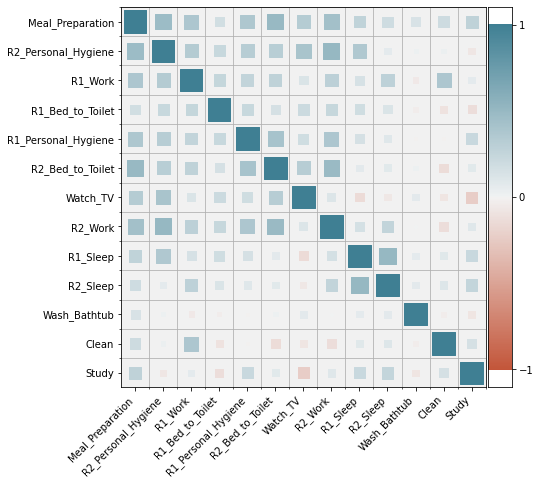

In [6]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(7,7))
corrplot(freq.corr())

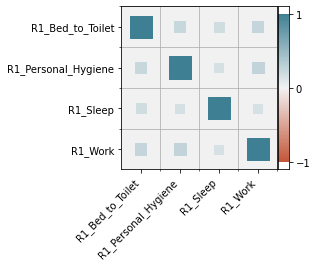

In [10]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(3,3))
cor_mat = pd.DataFrame([freq['R1_Bed_to_Toilet'],freq['R1_Personal_Hygiene'],freq['R1_Sleep'],freq['R1_Work']]).transpose()
corrplot(cor_mat.corr())

In [309]:
cor_mat = pd.DataFrame([dura['R1_Bed_to_Toilet'],freq['R1_Sleep']]).transpose()

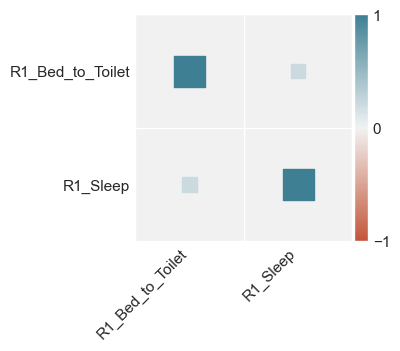

In [310]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(3,3))
corrplot(cor_mat.corr())

In [ ]:
sns.pairplot(freq)

In [ ]:
sns.pairplot(dura)

In [ ]:
df_col

Index(['Meal_Preparation', 'R2_Personal_Hygiene', 'R1_Work',
       'R1_Bed_to_Toilet', 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Watch_TV', 'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study'],
      dtype='object')

In [ ]:
import july
from july.utils import date_range

code = 8

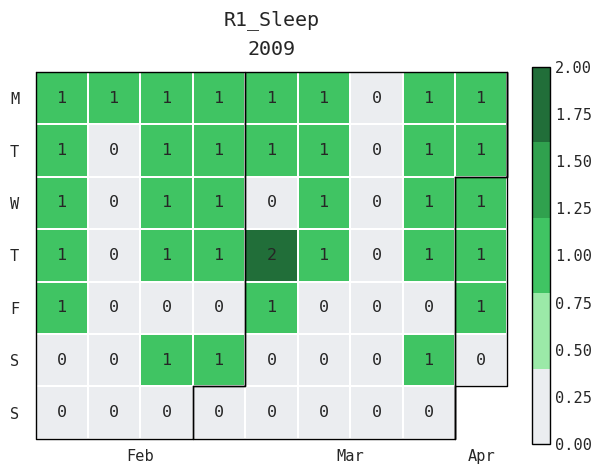

In [ ]:
freq_col = freq.columns

data_x = freq[freq_col[code]].index
data_y = freq[freq_col[code]]
data_t = freq_col[code]

july.heatmap(data_x,data_y, title=data_t, cmap="github",value_label=True,colorbar=True,month_grid=True)
plt.savefig('july_freq.jpg')

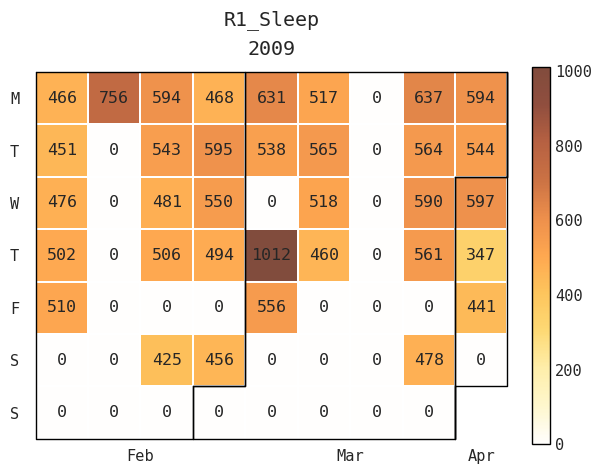

In [ ]:
dura
dura_col = dura.columns

data_x = dura[dura_col[code]].index
data_y = dura[dura_col[code]]
data_t = dura_col[code]

july.heatmap(data_x,data_y, title=data_t, cmap="golden",value_label=True,colorbar=True,month_grid=True)

plt.savefig('july_dura.jpg')

In [ ]:
sns.set_style("darkgrid")
temp = pd.concat([freq[dura_col[code]],dura[dura_col[code]]],axis=1)
temp.columns = ['freq','dura']

<AxesSubplot:ylabel='freq'>

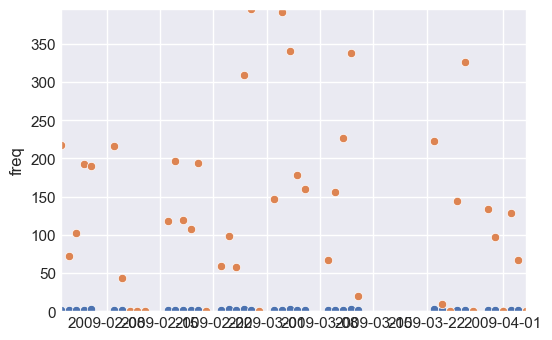

In [ ]:
sns.scatterplot(x = temp.index, y = temp['freq'])
sns.scatterplot(x = temp.index, y = temp['dura'])

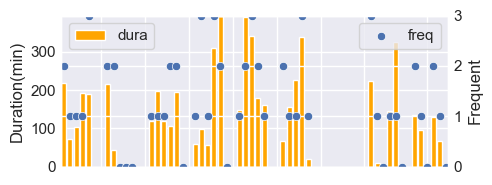

In [ ]:
fig,ax = plt.subplots(figsize = (5,2))
ax.bar(temp.index,temp['dura'],label = 'dura',color = 'orange')
ax2=ax.twinx()
ax2 = sns.scatterplot(x = temp.index, y = temp['freq'],label = 'freq')
ax.set_xticklabels([])
ax.set_ylabel('Duration(min)')
#ax.set_yticks([])
ax2.set_ylabel('Frequent')
#ax2.set_yticks([])
ax2.legend(loc='upper right')
ax.legend(loc='upper left')

[Text(0, 0.0, ''),
 Text(0, 100.0, ''),
 Text(0, 200.0, ''),
 Text(0, 300.0, ''),
 Text(0, 400.0, '')]

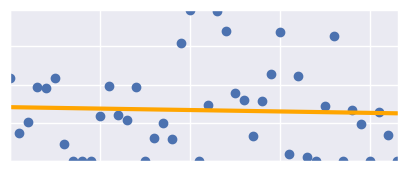

In [ ]:
from sklearn import linear_model

x = range(len(temp.index))
x = np.array(x)
x = x.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, temp['dura'])
y_pred = regr.predict(x)


# Plot outputs
fig,ax = plt.subplots(figsize = (5,2))
ax.scatter(x, temp['dura'])
ax.plot(x, y_pred, color="orange", linewidth=3)
ax.set_xticklabels([])
ax.set_yticklabels([])

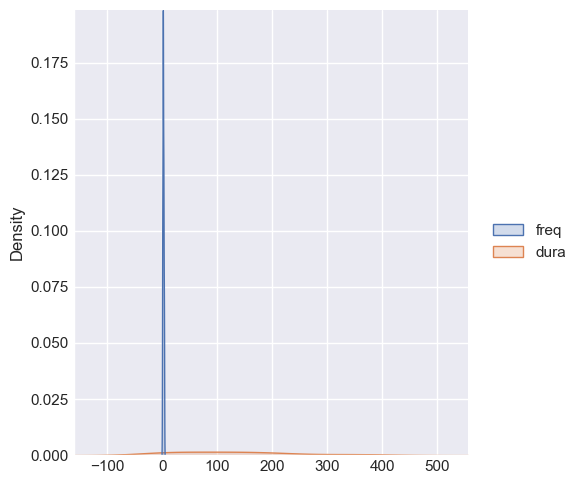

In [ ]:
sns.displot(temp,kind="kde", fill=True)

<AxesSubplot:xlabel='freq', ylabel='dura'>

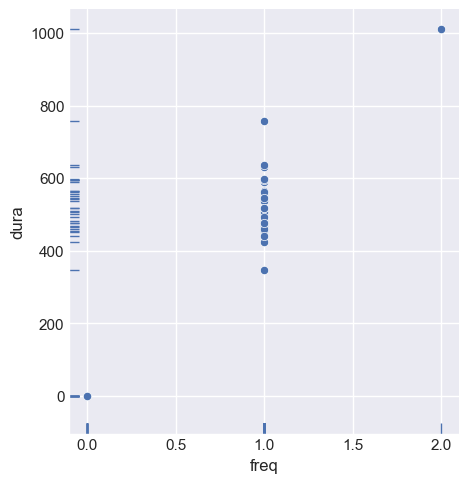

In [ ]:
sns.relplot(data= temp,x = 'freq',y = 'dura')
sns.rugplot(data= temp,x = 'freq',y = 'dura')

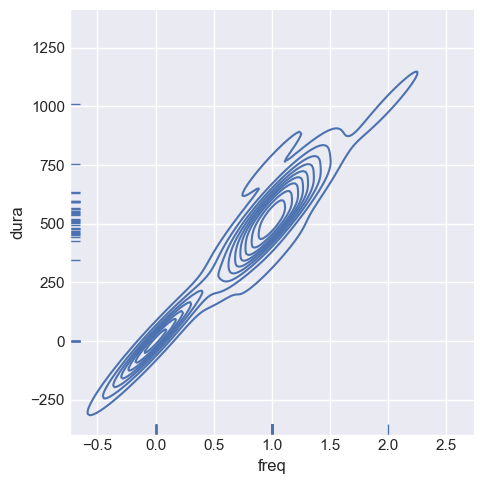

In [ ]:
sns.displot(
    data= temp,x = 'freq',y = 'dura',
    kind="kde", rug=True
)

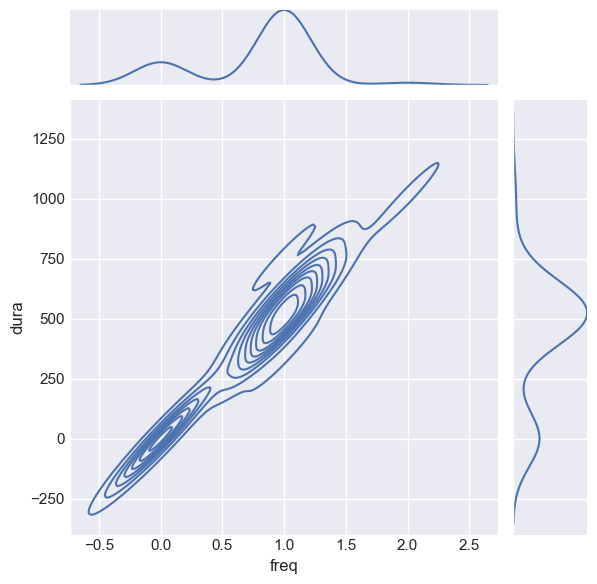

In [ ]:
sns.jointplot(
    data= temp,
    x = 'freq',
    y = 'dura',
    kind="kde"
)

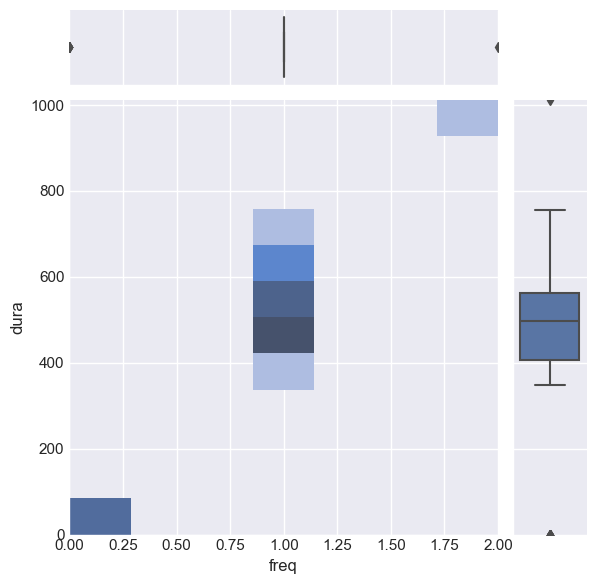

In [ ]:
g = sns.JointGrid(data= temp,
    x = 'freq',
    y = 'dura',
    )
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

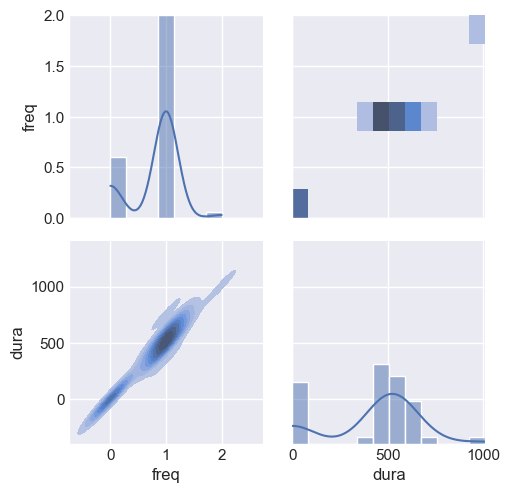

In [ ]:
g = sns.PairGrid(temp)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)